In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sqlalchemy import create_engine
import warnings

In [2]:
warnings.filterwarnings('ignore')

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

student_df = pd.read_sql_query('select * from useducation',con=engine)

# no need for an open connection, 
# as we're only doing a single query
engine.dispose()

## Assignment

In this assignment, you'll continue working with the [U.S. Education Dataset](https://www.kaggle.com/noriuk/us-education-datasets-unification-project/) from Kaggle.

Don't forget to apply the most suitable missing value filling techniques you applied in the previous checkpoints to the data. You should provide your answers to the following questions after you handled the missing values.

In [3]:
columns = ['ENROLL', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'GRADES_PK_G', 'GRADES_KG_G',
       'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G',
       'GRADES_9_12_G', 'GRADES_ALL_G', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
       'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE']

states = student_df.STATE.unique()

# dealing with nulls by interpolation
for state in states:
    student_df.loc[student_df['STATE']==state, columns] = student_df.loc[student_df['STATE']==state, columns].interpolate()

# dropping the ramainders
student_df.dropna(inplace=True)

In [4]:
student_df.info()
# nulls have been handled

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1046 entries, 54 to 1491
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PRIMARY_KEY                   1046 non-null   object 
 1   STATE                         1046 non-null   object 
 2   YEAR                          1046 non-null   int64  
 3   ENROLL                        1046 non-null   float64
 4   TOTAL_REVENUE                 1046 non-null   float64
 5   FEDERAL_REVENUE               1046 non-null   float64
 6   STATE_REVENUE                 1046 non-null   float64
 7   LOCAL_REVENUE                 1046 non-null   float64
 8   TOTAL_EXPENDITURE             1046 non-null   float64
 9   INSTRUCTION_EXPENDITURE       1046 non-null   float64
 10  SUPPORT_SERVICES_EXPENDITURE  1046 non-null   float64
 11  OTHER_EXPENDITURE             1046 non-null   float64
 12  CAPITAL_OUTLAY_EXPENDITURE    1046 non-null   float64
 13  GR

### Say, we want to understand the relationship between the expenditures of the governments and the students' overall success in the math and reading.

### 1. Create a new score variable from the weighted averages of all score variables in the datasets. **Notice that the number of students in the 4th grade isn't the same as the number of students in the 8th grade. So, you should appropriately weigh the scores!**.

In [5]:
student_df[['GRADES_4_G', 'GRADES_8_G','AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
       'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE']]

,GRADES_4_G,GRADES_8_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
54,57701.0,53500.0,215.834434,265.993417,206.291984,262.448330
55,34255.0,36471.0,211.616130,257.647254,208.685273,266.423396
57,50807.0,47665.0,222.219036,273.200878,215.523979,266.856804
58,39093.0,34662.0,228.105503,275.202320,224.712775,264.457874
59,8285.0,8265.0,217.181255,263.834857,207.792430,262.255809
...,...,...,...,...,...,...
1487,96851.0,95221.0,248.041059,290.081407,227.598382,273.402640
1488,82404.0,79483.0,241.701001,289.131257,223.123409,267.744778
1489,19814.0,20426.0,236.057019,273.415854,217.316396,271.617023
1490,60999.0,61084.0,240.389213,288.143144,219.612694,258.700304


In [6]:
# creating a weighted avg
student_df['score'] = ((((((student_df['AVG_MATH_4_SCORE'] + student_df['AVG_READING_4_SCORE'])/2)
                        *student_df['GRADES_4_G']) 
                        +
                      (((student_df['AVG_MATH_8_SCORE'] + student_df['AVG_READING_8_SCORE'])/2)
                      *student_df['GRADES_8_G']))
                        /(student_df['GRADES_4_G']+student_df['GRADES_8_G'])))


### 2. What are the correlations between this newly created score variable and the expenditure types? Which 1 of the expenditure types is more correlated than the others?


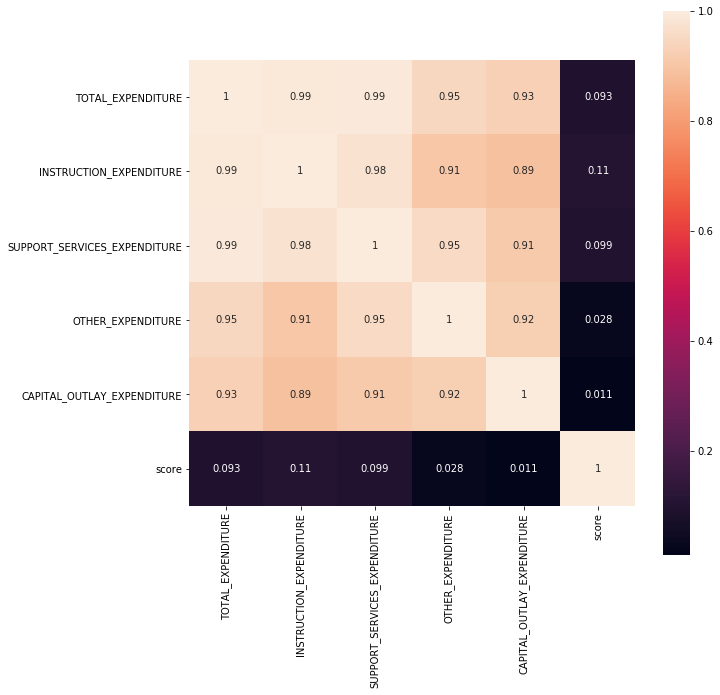

In [10]:
# creating a df with only the variables we are interested in
expends_score = student_df[['TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'score']]

# correlation matrix
expends_score_corr = expends.corr()

# plotting heatmap
plt.figure(figsize=(10,10))
_=sns.heatmap(expends_score_corr, square=True, annot=True)

In [8]:
expends_score_corr

,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,score
TOTAL_EXPENDITURE,1.000000,0.990829,0.993175,0.946483,0.928576,0.093020
INSTRUCTION_EXPENDITURE,0.990829,1.000000,0.975867,0.907235,0.889763,0.105787
SUPPORT_SERVICES_EXPENDITURE,0.993175,0.975867,1.000000,0.953789,0.913680,0.098643
OTHER_EXPENDITURE,0.946483,0.907235,0.953789,1.000000,0.924197,0.027635
CAPITAL_OUTLAY_EXPENDITURE,0.928576,0.889763,0.913680,0.924197,1.000000,0.010670
score,0.093020,0.105787,0.098643,0.027635,0.010670,1.000000


Instruction expenditure is most correlated with the new 'score' variable

### 3. Now, apply PCA to the 4 expenditure types. How much of the total variance is explained by the 1st component?


In [15]:
# df with just expenditures
expends = student_df[['TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE']]

stndzd_expends = StandardScaler().fit_transform(expends)

sklearn_PCA = PCA(n_components=1)

expend_PCA = sklearn_PCA.fit_transform(stndzd_expends)

print(
    'The percentage of total variance in the dataset explained by each',
    'component from Sklearn PCA. \n',
    sklearn_PCA.explained_variance_ratio_
)

The percentage of total variance in the dataset explained by each component from Sklearn PCA. 
 [0.9541168]


Over 95% of the data can be explained by the first principle component

### 4. What is the correlation between the overall score variable and the 1st principal component? 


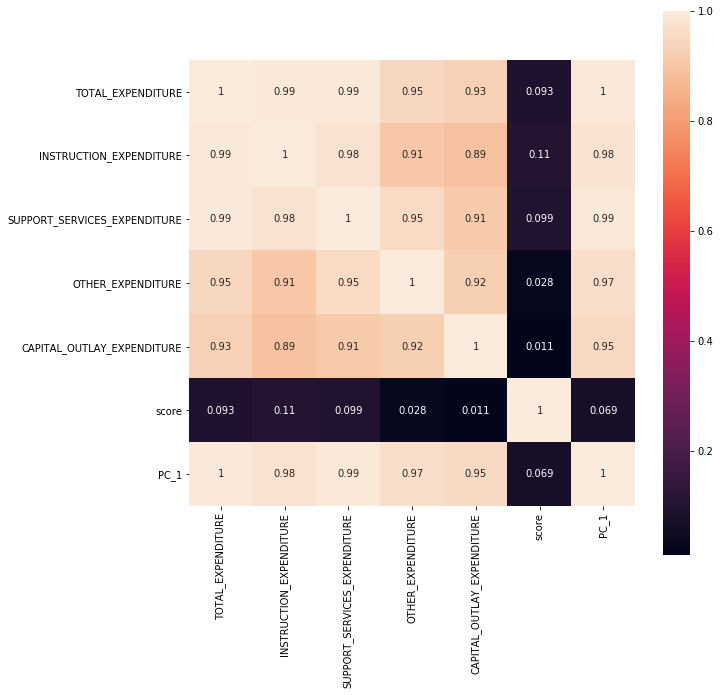

In [19]:
# new column for principle component 1
student_df['PC_1'] = expend_PCA

# expenditures, score and principle component 1 dataframe
expends_score_pc1 = student_df[['TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'score', 'PC_1']]

# expenditures, score and principle component 1 correlation matrix
E_S_P_corr = expends_score_pc1.corr()

plt.figure(figsize=(10,10))
sns.heatmap(E_S_P_corr, square=True, annot=True);

In [22]:
E_S_P_corr

,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,score,PC_1
TOTAL_EXPENDITURE,1.000000,0.990829,0.993175,0.946483,0.928576,0.093020,0.995210
INSTRUCTION_EXPENDITURE,0.990829,1.000000,0.975867,0.907235,0.889763,0.105787,0.975856
SUPPORT_SERVICES_EXPENDITURE,0.993175,0.975867,1.000000,0.953789,0.913680,0.098643,0.990651
OTHER_EXPENDITURE,0.946483,0.907235,0.953789,1.000000,0.924197,0.027635,0.968760
CAPITAL_OUTLAY_EXPENDITURE,0.928576,0.889763,0.913680,0.924197,1.000000,0.010670,0.952869
score,0.093020,0.105787,0.098643,0.027635,0.010670,1.000000,0.069272
PC_1,0.995210,0.975856,0.990651,0.968760,0.952869,0.069272,1.000000


PC_1 has a much higher correlation to Total Expenditure and Support Services and little correlation to the overall score variable. This makes sense since PC_1 was created from the expenditure variables which already had a low correlation to the score variable.

### 5. If you were to choose the best variables for your model, would you prefer using the 1st principal component instead of the expenditure variables? Why?

As a measure of correlation to the score, PC_1 has lower correlation coefficient than Total_Expenditure and Support Services Expenditure. PCA in this instance would also be unstable I would rather look for a different variable in the df that had more correlation to overall score, but if I had to choose, I would choose the expenditure variables.